In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel
%load_ext autoreload
%autoreload 2

In [3]:

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 

from functools import partial
from src.utils.logger import logger

In [4]:
# Load the provided test data
csv_file_name = os.path.join('.', 'data', 'part_10_raw.csv')
data_df = pd.read_csv(csv_file_name)
# Drop duplicate rows right away
data_df.drop_duplicates(inplace=True)

In [5]:
# Check on the data columns
data_df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID'],
      dtype='object')

In [6]:
# Get the data description
info_df = data_df.describe(include = 'all')
info_df.loc['count NaN'] = data_df.isnull().sum()
display(info_df)

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
count,57832,57517,57794,57770,57730,53167,57683,57666
unique,24940,6992,5758,60,21,3209,57611,54410
top,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,259,200,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,"{\""tags\"":[{\""sizes\"":[{\""width\"":728,\""height...",cr1nJWQB5cBXmMW1hh_4
freq,11286,2117,261,25771,20812,11165,28,7
count NaN,1,316,39,63,103,4666,150,167


In [7]:
# Infer the best data types
data_df = data_df.convert_dtypes()
# Check on the column types
data_df.dtypes

CLIENT_IP                 string
CLIENT_USERAGENT          string
REQUEST_SIZE              string
RESPONSE_CODE             string
MATCHED_VARIABLE_SRC      string
MATCHED_VARIABLE_NAME     string
MATCHED_VARIABLE_VALUE    string
EVENT_ID                  string
dtype: object

In [8]:
from src.wrangler.utils import INT_COLUMNS
from src.wrangler.utils import STRING_COLUMNS
from src.wrangler.utils import float_converter

# Convert int columns to float (later to int once the NaN values are removed)
for col_name, val_limits in INT_COLUMNS.items():
    logger.info(f'Converting column: "{col_name}" values to float type, with limits: {val_limits}')
    converter = partial(float_converter, **val_limits)
    data_df[col_name] = data_df[col_name].apply(converter)

# Convert string columns to string
for col_name in STRING_COLUMNS:
    data_df[col_name] = data_df[col_name].astype('string')

# Check on the column types
data_df.dtypes

15:22:24 INFO (472842837:7): Converting column: "REQUEST_SIZE" values to float type, with limits: {'vmin': 0, 'vmax': None}
15:22:24 INFO (472842837:7): Converting column: "RESPONSE_CODE" values to float type, with limits: {'vmin': 100, 'vmax': 599}


CLIENT_IP                  string
CLIENT_USERAGENT           string
REQUEST_SIZE              float64
RESPONSE_CODE             float64
MATCHED_VARIABLE_SRC       string
MATCHED_VARIABLE_NAME      string
MATCHED_VARIABLE_VALUE     string
EVENT_ID                   string
dtype: object

In [9]:
# Now convert the float columns into int and drop the NaN values,
# it is safe since these columns data is filled by the server side
for col_name in INT_COLUMNS.keys():
    data_df = data_df[data_df[col_name].notna()]
    data_df[col_name] = data_df[col_name].astype('int')
    logger.info(f'Column "{col_name}" min value is: {data_df[col_name].min()}, max values is: {data_df[col_name].max()}')

15:22:24 INFO (2113006501:6): Column "REQUEST_SIZE" min value is: 15, max values is: 10529650
15:22:24 INFO (2113006501:6): Column "RESPONSE_CODE" min value is: 200, max values is: 504


In [10]:
# Make sure there is no NaN values in string columns, make replacements
data_df[STRING_COLUMNS] = data_df[STRING_COLUMNS].fillna(value='')

In [11]:
# Check on the column types
data_df.dtypes

CLIENT_IP                 string
CLIENT_USERAGENT          string
REQUEST_SIZE               int64
RESPONSE_CODE              int64
MATCHED_VARIABLE_SRC      string
MATCHED_VARIABLE_NAME     string
MATCHED_VARIABLE_VALUE    string
EVENT_ID                  string
dtype: object

In [12]:
# Count the NaN values in the resulting df for sanity
data_df.isnull().sum()

CLIENT_IP                 0
CLIENT_USERAGENT          0
REQUEST_SIZE              0
RESPONSE_CODE             0
MATCHED_VARIABLE_SRC      0
MATCHED_VARIABLE_NAME     0
MATCHED_VARIABLE_VALUE    0
EVENT_ID                  0
dtype: int64

In [13]:
# Check on the data head
data_df.head(10)

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
0,188.138.92.55,,166,404,REQUEST_URI,,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp
5,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,404,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD
6,88.198.201.245,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1031,302,REQUEST_GET_ARGS,REQUEST_GET_ARGS.rid,3585221644,9KP-ImQB5cBXmMW1yeXY
7,77.72.142.170,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,763,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,214296569,97JpJGQB5cBXmMW1WqBh
8,94.50.192.153,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,3786,404,REQUEST_METHOD\';\'REQUEST_CONTE,,POST\';\'multipart/form-data; boundary=----Web...,irs7_mMBjksgoq1eoQ7a
9,83.246.141.54,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,840,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,51660445,g4RdIGQB5cBXmMW10nGg


In [14]:
############################################################
# Now let us look at the columns to figure out which ones
# might be of use and if additional columns may be added
############################################################

In [15]:
#----------------------------------------------------------
# Consider the CLIENT_IP column

In [16]:
# Check on the IP addresses distribution
ip_counts_df = data_df['CLIENT_IP'].value_counts()
ip_counts_df.head(10)

217.175.140.69     11286
37.46.129.136        771
188.43.52.163        767
5.143.231.38         757
192.168.100.63       748
185.26.112.50        687
62.168.244.229       542
103.208.220.130      303
185.70.104.11        280
178.236.141.227      214
Name: CLIENT_IP, dtype: Int64

<AxesSubplot: >

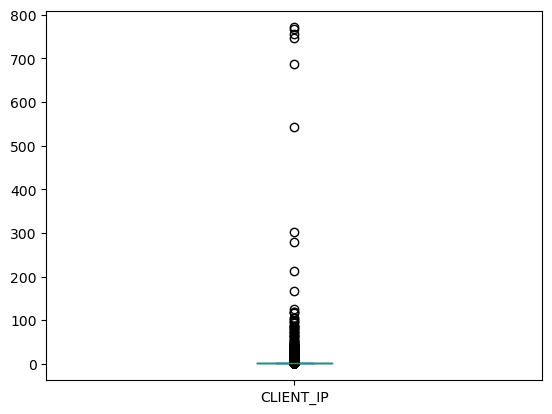

In [17]:
# Plot the the IP counts other than for '217.175.140.69'
MAX_COUNT_IP = ip_counts_df.index[0]
ip_counts_df[ip_counts_df.index != '217.175.140.69'].plot.box()

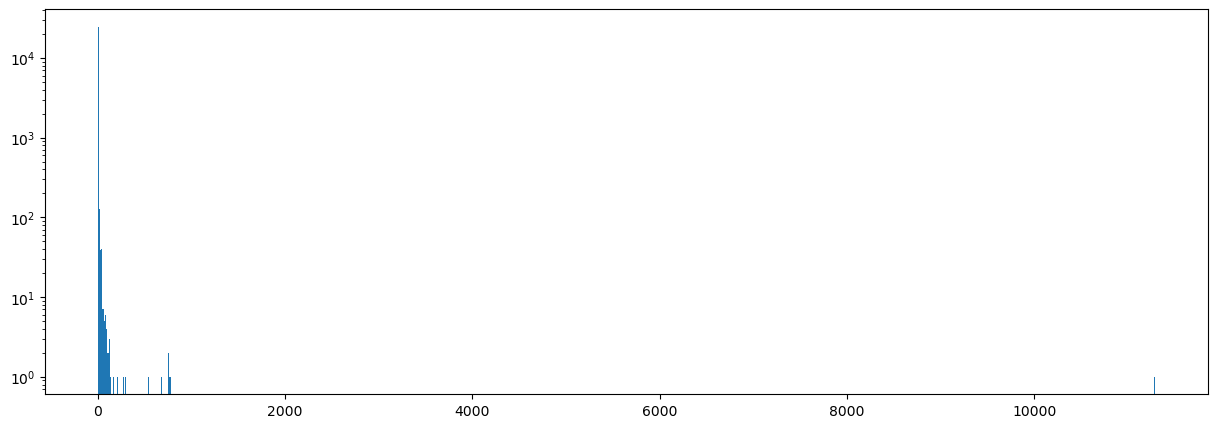

In [18]:
# Show the distribution of request counts per IP address (x-axis)
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.hist(ip_counts_df, log=True, bins=1000)

In [19]:
# The number of requests from the IP '217.175.140.69' is a clear outlier
max_ip_count = ip_counts_df.loc[MAX_COUNT_IP]
logger.info(f'About {round(max_ip_count*100/len(data_df), 2)}% ({max_ip_count}/{len(data_df)}) of all requests are done from IP: "{MAX_COUNT_IP}"')

15:22:25 INFO (1032629450:3): About 19.55% (11286/57729) of all requests are done from IP: "217.175.140.69"


In [20]:
# Check on the requests done from that IP
max_count_ip_df = data_df[data_df['CLIENT_IP'] == MAX_COUNT_IP]
max_count_ip_df.head(10)

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
11,217.175.140.69,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,735,302,REQUEST_COOKIES,REQUEST_COOKIES.user_id,4f1a4c5f-9636-4e6d-9713-b94a7e22cbb0,YXqIH2QB5cBXmMW1PQw-
15,217.175.140.69,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,551,304,REQUEST_HEADERS,REQUEST_HEADERS.If-Modified-Since,"Thu, 25 Jan 2018 07:17:06 GMT",wm-kHmQB5cBXmMW1NATt
17,217.175.140.69,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,2277,200,REQUEST_GET_ARGS,REQUEST_GET_ARGS.callback_uid,2c42dc598cf3ff,mV0PHWQB5cBXmMW1Nuon
21,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,680,302,REQUEST_GET_ARGS,REQUEST_GET_ARGS.r,//dmg.digitaltarget.ru/1/224/i/i?a=224&e=5a65a...,Oq8KJGQB5cBXmMW1vQVL
27,217.175.140.69,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,4660,200,REQUEST_GET_ARGS,REQUEST_GET_ARGS.q,"{\""tags\"":[{\""sizes\"":[{\""width\"":728,\""height...",D759JWQB5cBXmMW1Lw0r
28,217.175.140.69,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,3007,502,REQUEST_GET_ARGS,REQUEST_GET_ARGS.callback_uid,1715ca8ec91592a,NbkMJWQB5cBXmMW1VVhF
39,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,3795,307,REQUEST_COOKIES,REQUEST_COOKIES.rpx,"31956=70895,0,1,,&6286=70686,0,1,,&106496=7085...",QIEmIGQB5cBXmMW1qsEs
41,217.175.140.69,*BgfBAAAA-EAAAEFBAAQLljjU6Vfh4i4fw0IhLFvB2RNU3...,218,200,REQUEST_PATH,REQUEST_PATH,/updates/kdb/i386/diffs/base087e.kdc.ply,_lPZG2QB5cBXmMW1csGr
43,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3002,302,REQUEST_COOKIES,REQUEST_COOKIES.KRTBCOOKIE_561,9455-uid:076313ed-38b6-47d3-9c7d-e7278703aaae,smO3HWQB5cBXmMW1V7UQ
53,217.175.140.69,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2831,200,REQUEST_COOKIES,REQUEST_COOKIES.icu,ChgI44kuEAoYFyAXKBcw-6fA0wU4F0AXSBcKGAjLpDMQCh...,OrfZJGQB5cBXmMW1kyE-


In [21]:
from src.wrangler.utils import convert_ipv4_to_ipv6

# Convert all the addresses to the uniform IPv6 variant
data_df['CLIENT_IP'] = data_df['CLIENT_IP'].apply(convert_ipv4_to_ipv6)

In [22]:
from src.wrangler.utils import check_invalid_ip_addresses

# Check on the IP address values as well, we expect IP4 and IP6 addresses
unique_client_ips = data_df['CLIENT_IP'].unique()
check_invalid_ip_addresses(unique_client_ips)

15:22:26 INFO (utils:95): Found 21 invalid IP addresses:
['2a01:598:9902:df0c:8115:691e:c38', '2001:7d0:87e2:1480:e870:b625:397', '2a02:2168:13cb:4300:b5d0:78ec:8d', '2a00:1148:b0ba:2615:8b4:f98f:f56', '2a02:2698:3c23:65d4:1839:9c8f:ef', '2a02:2698:7c25:f4dc:409e:83aa:61', '2a00:1370:812a:1379:3d16:a3b4:88', '2a02:2168:d84:ec00:54d3:8341:440', '2a02:c7d:1171:8300:2980:a4b7:4f9', '2a02:2698:7022:939a:c473:f721:9d', '2a02:2168:f55:1b00:c589:6624:fb4', '2a00:1370:8120:29a1:e89b:bb06:6f', '2a00:1370:8120:29a1:f100:f51c:9a', '2a02:2698:4c27:6f12:2938:d5d9:3c', '2a02:2168:1b49:d900:71e7:9ac2:bf', '2a01:540:2001:ad53:204f:349b:d5a', '2001:5b0:216a:be90:280:aeff:fe21', '2a02:2168:e4e:2300:b6a:2db3:fc95', '2a00:1370:811e:814:b412:ad6a:eb6', '2a00:1370:8112:4467:a57c:479b:8e', '2a02:2698:4c27:37bd:846c:d5bd:49']


In [23]:
from src.wrangler.utils import check_invalid_ip_addresses
from src.wrangler.utils import fix_missing_ipv6_zeroes

# Fix the IPv6 addresses missing the digits and convert to int values for future ease of use

data_df['CLIENT_IP'] = data_df['CLIENT_IP'].apply(fix_missing_ipv6_zeroes)

# Do the second check to make sure all are valid
unique_client_ips = data_df['CLIENT_IP'].unique()
check_invalid_ip_addresses(unique_client_ips)

15:22:26 INFO (utils:95): Found 0 invalid IP addresses:
[]


In [24]:
# CLIENT_IP column conclusion:
#    Is useful as too many requests from the same IP address can be
#    a sign of an attack, also a malformed IP can be a sign of an attack
#----------------------------------------------------------

In [25]:
#----------------------------------------------------------
# Consider the CLIENT_USERAGENT column

In [26]:
# List the unique user agents used from the IP address from which the maximum number of requests came
unique_agent_values_mci = max_count_ip_df['CLIENT_USERAGENT'].unique()
logger.info(f'There are {len(unique_agent_values_mci)} distinct user agent values for IP: "{MAX_COUNT_IP}", namely:\n{unique_agent_values_mci}')

15:22:26 INFO (1046836279:3): There are 557 distinct user agent values for IP: "217.175.140.69", namely:
<StringArray>
[                                                                                                                                                                                                                                                                       'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36',
                                                                                                                                                                                                                                                                        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.112 Safari/537.36',
                                                                                                                                             

In [27]:
# List the unique user agents used from All the IP addresses
unique_agent_values_all = data_df['CLIENT_USERAGENT'].unique()
logger.info(f'There are {len(unique_agent_values_all)} distinct user agent values for {len(data_df)} requests')

15:22:26 INFO (1228870834:3): There are 6950 distinct user agent values for 57729 requests


In [28]:
from src.wrangler.utils import is_bad_user_agent

broken_agent_values_all = [user_agent for user_agent in unique_agent_values_all if is_bad_user_agent(user_agent)]
logger.info(f'There are: {len(broken_agent_values_all)} distinct malformed user agent values present, which is {round(len(broken_agent_values_all)*100/len(unique_agent_values_all), 2)} %!')

15:22:26 INFO (3889525522:4): There are: 596 distinct malformed user agent values present, which is 8.58 %!


In [29]:
# Check on the percent of malformed user agent values for maximum count IP:
broken_agent_values_mci = [user_agent for user_agent in unique_agent_values_mci if is_bad_user_agent(user_agent)]
logger.info(f'There are: {len(broken_agent_values_mci)} distinct malformed user agent values for IP: "{MAX_COUNT_IP}" present, which is {round(len(broken_agent_values_mci)*100/len(unique_agent_values_mci), 2)} %!')

15:22:26 INFO (1949312520:3): There are: 337 distinct malformed user agent values for IP: "217.175.140.69" present, which is 60.5 %!


In [30]:
from src.wrangler.utils import is_good_user_agent

# Extend data with the validity flag for the user agent as it may be a good indicator of the attack
# The percent of malformed user agent values is significantly higher for the IP from which most requests came
data_df['IS_USERAGENT_VALID'] = data_df['CLIENT_USERAGENT'].apply(is_good_user_agent)

In [31]:
# CLIENT_USERAGENT column conclusion:
#    Is useful, as malformed user agents can be a sign of an attack
#    Also, using multiple clients from the same IP address or a
#    specific user agent type used.
#----------------------------------------------------------

In [32]:
#----------------------------------------------------------
# Consider the REQUEST_SIZE column

<AxesSubplot: >

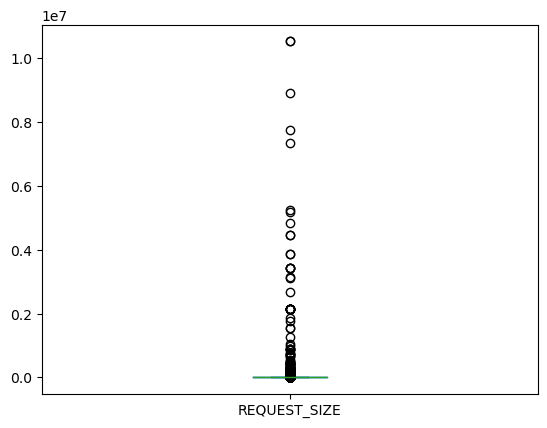

In [33]:
# Check on the distribution of the request sizes, there are clear outliers here
# The request sizes go up to 10 megabytes which may be an indicator of an attack
data_df['REQUEST_SIZE'].plot.box()

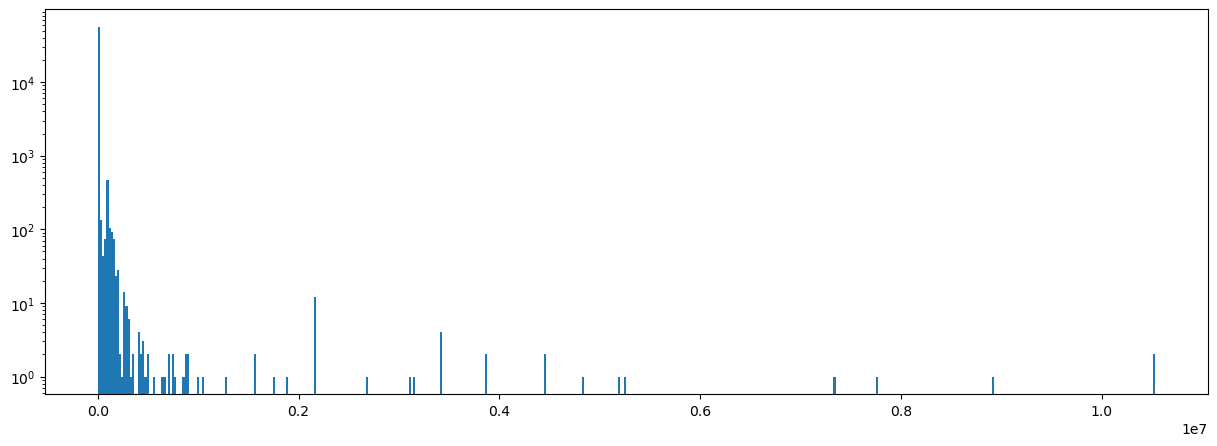

In [34]:
# Given most of the requests are small
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.hist(data_df['REQUEST_SIZE'], log=True, bins=500)

In [35]:
# REQUEST_SIZE column conclusion:
#    Is useful, as too little or too much request data can be a sign of an attack.
#---------------------------------------------------------

In [36]:
#----------------------------------------------------------
# Consider the RESPONSE_CODE column
#
# According to:
#    https://developer.mozilla.org/en-US/docs/Web/HTTP/Status
# The valid response code ranges are:
#   Informational responses (100 – 199)
#   Successful responses (200 – 299)
#   Redirection messages (300 – 399)
#   Client error responses (400 – 499)
#   Server error responses (500 – 599)

In [37]:
# Check on the RESPONSE_CODE distinct value counts
resp_codes_df = data_df['RESPONSE_CODE'].value_counts()
logger.info(f'There are {len(resp_codes_df)} distinct response codes present')
resp_codes_df.head(10)

15:22:27 INFO (511511623:3): There are 19 distinct response codes present


200    25771
404    20367
302     6630
403     1156
304      940
504      700
301      584
502      558
500      318
400      212
Name: RESPONSE_CODE, dtype: int64

In [38]:
# Let us check on the codes we have in the data
resp_codes = data_df['RESPONSE_CODE'].unique()
logger.info(f'The min/max values for the available response codes are: {resp_codes.min()}/{resp_codes.max()}')
num_inv_low = np.sum(data_df['RESPONSE_CODE'] < 100)
num_inv_high = np.sum(data_df['RESPONSE_CODE'] > 599)
logger.info(f'The number of invalid response codes present below/above valid ranges is: {num_inv_low}/{num_inv_high}')

15:22:27 INFO (970884873:3): The min/max values for the available response codes are: 200/504
15:22:27 INFO (970884873:6): The number of invalid response codes present below/above valid ranges is: 0/0


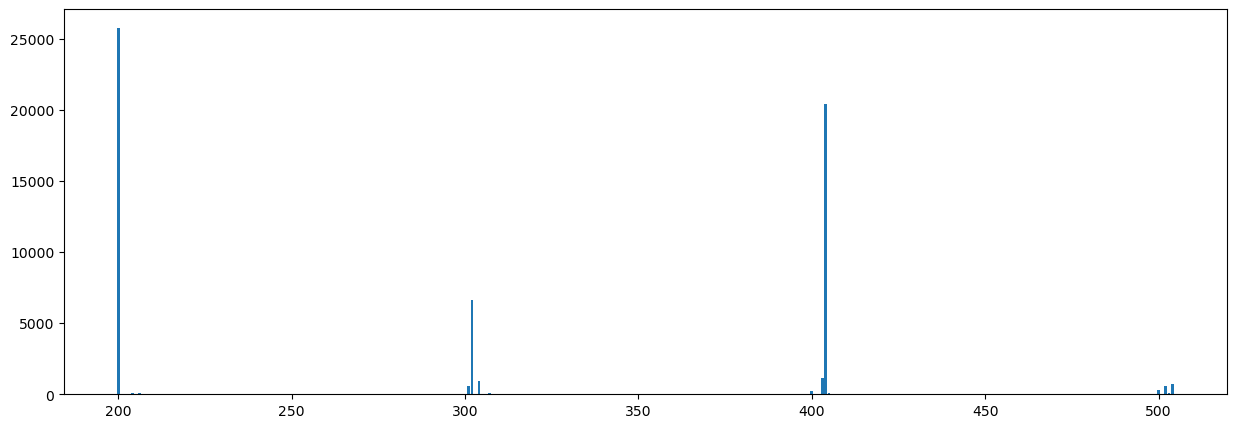

In [39]:
# Let us visualize the response codes
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.bar(x=resp_codes_df.index, height=resp_codes_df.values)

In [40]:
# RESPONSE_CODE column conclusion:
#    Is useful as a negative (error response code) server response may have correlation with the attack
#    In the data at hand it is not clear how much of the data corresponds to the actual attacks
#---------------------------------------------------------

In [41]:
#----------------------------------------------------------
# Consider the MATCHED_VARIABLE_SRC column

In [42]:
from src.wrangler.utils import split_data_values

# Count the maximum number of SRC entries per row
src_counts = data_df['MATCHED_VARIABLE_SRC'].apply(lambda val : len(split_data_values(val)))
logger.info(f'The are min/max SRC values per row: {src_counts.min()}/{src_counts.max()}')
logger.info(f'There are {np.sum(src_counts > 1)}/{len(data_df)} rows with more than 1 SRC value')

15:22:27 INFO (2379774332:5): The are min/max SRC values per row: 1/2
15:22:27 INFO (2379774332:6): There are 1705/57729 rows with more than 1 SRC value


In [43]:
# Split into first and second SRC column
data_df['MATCHED_VARIABLE_SRC'] = data_df['MATCHED_VARIABLE_SRC'].apply(split_data_values)
data_df[['CLIENT_IP', 'MATCHED_VARIABLE_SRC']].head(10)

,CLIENT_IP,MATCHED_VARIABLE_SRC
0,2002:0000:0000:0000:0000:0000:bc8a:5c37,[REQUEST_URI]
1,2002:0000:0000:0000:0000:0000:5d9e:d783,[REQUEST_GET_ARGS]
2,2002:0000:0000:0000:0000:0000:b07b:f040,[REQUEST_PATH]
3,2002:0000:0000:0000:0000:0000:494e:513f,[REQUEST_GET_ARGS]
4,2002:0000:0000:0000:0000:0000:4266:092c,[REQUEST_GET_ARGS]
5,2002:0000:0000:0000:0000:0000:4fb7:57f7,[REQUEST_HEADERS]
6,2002:0000:0000:0000:0000:0000:58c6:c9f5,[REQUEST_GET_ARGS]
7,2002:0000:0000:0000:0000:0000:4d48:8eaa,[REQUEST_GET_ARGS]
8,2002:0000:0000:0000:0000:0000:5e32:c099,"[REQUEST_METHOD, REQUEST_CONTE]"
9,2002:0000:0000:0000:0000:0000:53f6:8d36,[REQUEST_GET_ARGS]


In [44]:
from src.wrangler.utils import get_first_val

# Check on the distinct SRC values
dist_src_vals = data_df['MATCHED_VARIABLE_SRC'].apply(get_first_val).unique()
dist_src_vals

array(['REQUEST_URI', 'REQUEST_GET_ARGS', 'REQUEST_PATH',
       'REQUEST_HEADERS', 'REQUEST_METHOD', 'REQUEST_COOKIES',
       'REQUEST_ARGS_KEYS', 'RESPONSE_HEADERS', 'REQUEST_POST_ARGS',
       'REQUEST_JSON', 'REQUEST_XML', 'REQUEST_ARGS', 'CLIENT_USERAGENT',
       'RESPONSE_BODY', 'CLIENT_SESSION_ID', 'REQUEST_CONTENT_TYPE',
       'REQUEST_QUERY', 'REQUEST_FILES', 'CLIENT_IP'], dtype=object)

In [45]:
from src.wrangler.utils import get_second_val

# Check on the distinct secondary SRC values
# Notice that some of them are truncated and need to be restored
dist_sec_src_vals = data_df['MATCHED_VARIABLE_SRC'].apply(get_second_val).unique()
dist_sec_src_vals

array(['', 'REQUEST_CONTE', 'REQUEST_HEADE', 'REQUEST_ARGS'], dtype=object)

In [46]:
from src.wrangler.utils import get_sec_src_value_substitute

# Create mapping for secondary values
sec_to_src_map = {sec_src_val : get_sec_src_value_substitute(sec_src_val) for sec_src_val in dist_sec_src_vals}

15:22:27 INFO (utils:46): Found the substitute: "REQUEST_CONTE" -> "REQUEST_CONTENT_TYPE", penalized Levenshtein similarity score: 7
15:22:27 INFO (utils:46): Found the substitute: "REQUEST_HEADE" -> "REQUEST_HEADERS", penalized Levenshtein similarity score: 2
15:22:27 INFO (utils:46): Found the substitute: "REQUEST_ARGS" -> "REQUEST_ARGS", penalized Levenshtein similarity score: 0


In [47]:
# Apply the substitution
fix_second_value = lambda lst : [lst[0], sec_to_src_map[lst[1]]] if len(lst) > 1 else lst
data_df['MATCHED_VARIABLE_SRC'] = data_df['MATCHED_VARIABLE_SRC'].apply(fix_second_value)
data_df[['CLIENT_IP', 'MATCHED_VARIABLE_SRC']].head(10)

,CLIENT_IP,MATCHED_VARIABLE_SRC
0,2002:0000:0000:0000:0000:0000:bc8a:5c37,[REQUEST_URI]
1,2002:0000:0000:0000:0000:0000:5d9e:d783,[REQUEST_GET_ARGS]
2,2002:0000:0000:0000:0000:0000:b07b:f040,[REQUEST_PATH]
3,2002:0000:0000:0000:0000:0000:494e:513f,[REQUEST_GET_ARGS]
4,2002:0000:0000:0000:0000:0000:4266:092c,[REQUEST_GET_ARGS]
5,2002:0000:0000:0000:0000:0000:4fb7:57f7,[REQUEST_HEADERS]
6,2002:0000:0000:0000:0000:0000:58c6:c9f5,[REQUEST_GET_ARGS]
7,2002:0000:0000:0000:0000:0000:4d48:8eaa,[REQUEST_GET_ARGS]
8,2002:0000:0000:0000:0000:0000:5e32:c099,"[REQUEST_METHOD, REQUEST_CONTENT_TYPE]"
9,2002:0000:0000:0000:0000:0000:53f6:8d36,[REQUEST_GET_ARGS]


In [48]:
# MATCHED_VARIABLE_SRC columns conclusion:
#    Are useful as contain specification of the request type that may be correlated with the attack types.
#---------------------------------------------------------

In [49]:
#----------------------------------------------------------
# Consider the MATCHED_VARIABLE_NAME column

In [50]:
from src.wrangler.utils import clean_up_variable_names

# Remove the repeated MATCHED_VARIABLE_SRC column values from MATCHED_VARIABLE_NAME
clean_up_name = lambda row: clean_up_variable_names(row['MATCHED_VARIABLE_NAME'], \
                                                    row['MATCHED_VARIABLE_SRC'])
data_df['MATCHED_VARIABLE_NAME'] = data_df.apply(clean_up_name, axis=1)

In [51]:
# Count the maximum number of NAME entries per row
src_counts = data_df['MATCHED_VARIABLE_NAME'].apply(lambda val : len(split_data_values(val)))
logger.info(f'The are min/max NAME values per row: {src_counts.min()}/{src_counts.max()}')
logger.info(f'There are {np.sum(src_counts > 1)}/{len(data_df)} rows with more than 1 NAME value')

15:22:27 INFO (2431830386:3): The are min/max NAME values per row: 1/11
15:22:27 INFO (2431830386:4): There are 394/57729 rows with more than 1 NAME value


In [52]:
# Split into distinct variable names
data_df['MATCHED_VARIABLE_NAME'] = data_df['MATCHED_VARIABLE_NAME'].apply(lambda names : split_data_values(names) if names != '' else [])

In [53]:
from src.wrangler.utils import fix_variable_names

# Split into distinct variable names
data_df['MATCHED_VARIABLE_NAME'] = data_df['MATCHED_VARIABLE_NAME'].apply(lambda names : fix_variable_names(names))

In [54]:
# Show the results head
data_df[['CLIENT_IP', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME']].head(20)

,CLIENT_IP,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME
0,2002:0000:0000:0000:0000:0000:bc8a:5c37,[REQUEST_URI],[]
1,2002:0000:0000:0000:0000:0000:5d9e:d783,[REQUEST_GET_ARGS],[url]
2,2002:0000:0000:0000:0000:0000:b07b:f040,[REQUEST_PATH],[]
3,2002:0000:0000:0000:0000:0000:494e:513f,[REQUEST_GET_ARGS],[url]
4,2002:0000:0000:0000:0000:0000:4266:092c,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_]
5,2002:0000:0000:0000:0000:0000:4fb7:57f7,[REQUEST_HEADERS],[User-Agent]
6,2002:0000:0000:0000:0000:0000:58c6:c9f5,[REQUEST_GET_ARGS],[rid]
7,2002:0000:0000:0000:0000:0000:4d48:8eaa,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_]
8,2002:0000:0000:0000:0000:0000:5e32:c099,"[REQUEST_METHOD, REQUEST_CONTENT_TYPE]",[]
9,2002:0000:0000:0000:0000:0000:53f6:8d36,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_]


In [55]:
# Check on the available counts for distinct values
all_names = None
for names in data_df['MATCHED_VARIABLE_NAME'].values:
    new_names = pd.Series(names, dtype='string')
    all_names = new_names if all_names is None else pd.concat([all_names, new_names])

In [56]:
# Now count the unique values
all_names_df = all_names.value_counts()
logger.info(f'There are {len(all_names_df)} distinct variable names present')
all_names_df.head(10)

15:22:42 INFO (1297094161:3): There are 3050 distinct variable names present


_JQUERY_NO_CHACHE_    11165
LtpaToken2             3948
User-cn                2444
action                 2394
rid                    2372
User-Agent             2028
id                     1454
url                    1352
AN-X-Request-Uuid      1024
If-Modified-Since       585
dtype: Int64

In [57]:
# MATCHED_VARIABLE_NAME column conclusion:
#    It seems to be useful as some of the names may indicate what
#    data is requested, like user ids or some user related cookies etc...
#---------------------------------------------------------

In [58]:
#----------------------------------------------------------
# Consider the MATCHED_VARIABLE_VALUE column

In [59]:
# Count the maximum number of NAME entries per row
src_counts = data_df['MATCHED_VARIABLE_VALUE'].apply(lambda val : len(split_data_values(val)))
logger.info(f'The are min/max VALUE values per row: {src_counts.min()}/{src_counts.max()}')
logger.info(f'There are {np.sum(src_counts > 1)}/{len(data_df)} rows with more than 1 VALUE value')

15:22:42 INFO (4258993274:3): The are min/max VALUE values per row: 1/36
15:22:42 INFO (4258993274:4): There are 1753/57729 rows with more than 1 VALUE value


In [60]:
# Split into distinct variable values
data_df['MATCHED_VARIABLE_VALUE'] = data_df['MATCHED_VARIABLE_VALUE'].apply(lambda values : split_data_values(values) if values != '' else [])

In [61]:
# Show the results head
data_df[['CLIENT_IP', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']].head(20)

,CLIENT_IP,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE
0,2002:0000:0000:0000:0000:0000:bc8a:5c37,[REQUEST_URI],[],[//tmp/20160925122692indo.php.vob]
1,2002:0000:0000:0000:0000:0000:5d9e:d783,[REQUEST_GET_ARGS],[url],[http://www.galitsios.gr/?option=com_k2]
2,2002:0000:0000:0000:0000:0000:b07b:f040,[REQUEST_PATH],[],"[/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""]"
3,2002:0000:0000:0000:0000:0000:494e:513f,[REQUEST_GET_ARGS],[url],[http://thereviewgroup.org/boss-capital/]
4,2002:0000:0000:0000:0000:0000:4266:092c,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_],[1516288084140]
5,2002:0000:0000:0000:0000:0000:4fb7:57f7,[REQUEST_HEADERS],[User-Agent],[Mozilla/5.0 (Linux; Android 6.0; LG-H815 Buil...
6,2002:0000:0000:0000:0000:0000:58c6:c9f5,[REQUEST_GET_ARGS],[rid],[3585221644]
7,2002:0000:0000:0000:0000:0000:4d48:8eaa,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_],[214296569]
8,2002:0000:0000:0000:0000:0000:5e32:c099,"[REQUEST_METHOD, REQUEST_CONTENT_TYPE]",[],"[POST, multipart/form-data; boundary=----WebKi..."
9,2002:0000:0000:0000:0000:0000:53f6:8d36,[REQUEST_GET_ARGS],[_JQUERY_NO_CHACHE_],[51660445]


In [62]:
# Check on the available counts for distinct values
all_values = None
for values in data_df['MATCHED_VARIABLE_VALUE'].values:
    new_values = pd.Series(values, dtype='string')
    all_values = new_values if all_values is None else pd.concat([all_values, new_values])

In [63]:
# Now count the unique values
all_values_df = all_values.value_counts()
logger.info(f'There are {len(all_values_df)} distinct variable values present')
all_values_df.head(10)

15:23:00 INFO (4060887584:3): There are 57802 distinct variable values present


POST                                                 1039
                                                      618
XMLHttpRequest                                        333
application/x-www-form-urlencoded; charset=UTF-8       77
application/x-www-form-urlencoded                      76
../../../../../../../../../boot.ini\\x0                46
../../../../../../../../../windows/win.ini\\x0         43
../../../../../../../../../winnt/win.ini\\x0           39
{\"tags\":[{\"sizes\":[{\"width\":728,\"height...      28
../../../../../../../../../etc/passwd\\x0              21
dtype: Int64

In [64]:
# MATCHED_VARIABLE_VALUE column conclusion:
#    Is useful, assumed it is the values sent by the client and not the data retrieved
#     from the server, as the provided request variable name values may contain
#    indications of the attack like some scripts for injection and etc
#---------------------------------------------------------

In [65]:
#----------------------------------------------------------
# Consider the EVENT_ID column

In [66]:
# Check on the EVENT_ID distinct value counts, we see there are some duplicates
event_id_df = data_df['EVENT_ID'].value_counts()
event_id_df.head(10)

                        64
cr1nJWQB5cBXmMW1hh_4     7
l1mUHGQB5cBXmMW1mdYm     6
XZ-bImQB5cBXmMW11ksX     6
m1K7G2QB5cBXmMW1pcnY     6
znQRH2QB5cBXmMW1_Hsj     5
dqqPI2QB5cBXmMW1L9-m     5
hlvDHGQB5cBXmMW1PWCN     4
a2ObHWQB5cBXmMW1lgdR     4
IW6QHmQB5cBXmMW1AQHH     4
Name: EVENT_ID, dtype: Int64

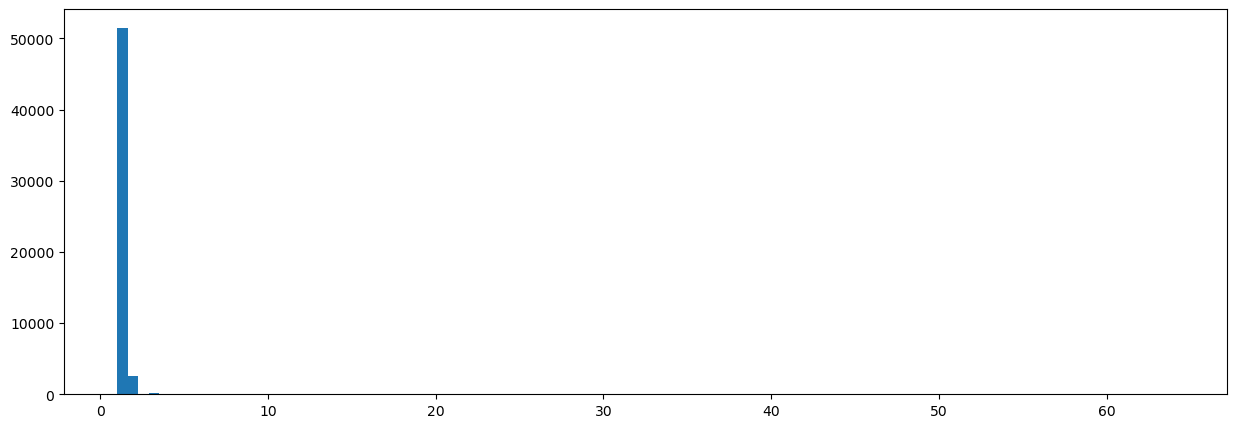

In [67]:
# Most event ids are not duplicated
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.hist(event_id_df, bins=100)

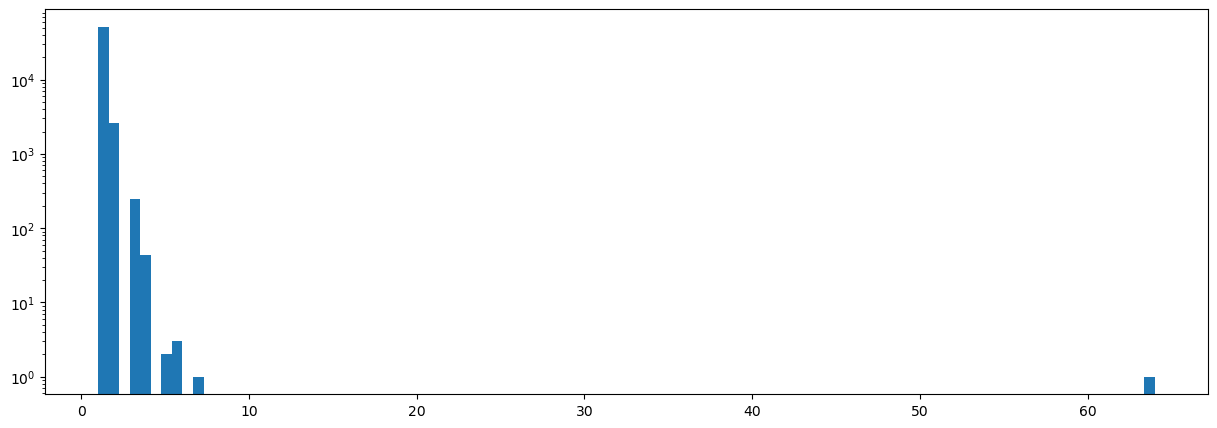

In [68]:
# In the log scale we see some duplication, yet the event id values are
# expected to be unique but as they seem to be constructed hashes values
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.hist(event_id_df, log=True, bins=100)

In [69]:
# The following percent of event ids are not unique
u_evt_id = np.sum(event_id_df == 1)
logger.info(f'There are {u_evt_id}/{len(data_df)} events with unique event ids')
d_evt_id = np.sum(event_id_df > 1)
logger.info(f'There are {d_evt_id}/{len(event_id_df)} repeating event ids')

15:23:00 INFO (1681978892:3): There are 51511/57729 events with unique event ids
15:23:00 INFO (1681978892:5): There are 2899/54410 repeating event ids


In [70]:
# EVENT_ID column conclusion:
#    Is not useful for the attack detection as it is supposed
#    to be assigned uniquely for each individual event.
#---------------------------------------------------------

In [71]:
from src.wrangler.utils import DATA_DELIMITER

# Re-join the MATCHED_VARIABLE_SRC, MATCHED_VARIABLE_NAME, and MATCHED_VARIABLE_VALUE column values
cols_to_restore = ['MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
for col_name in cols_to_restore:
    data_df[col_name] = data_df[col_name].apply(lambda lst: DATA_DELIMITER.join(lst))

In [72]:
# Write out the resulting dataframe
data_df = data_df[['EVENT_ID', 'CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'REQUEST_SIZE', 'RESPONSE_CODE', \
                   'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']]
csv_file_name = os.path.join('.', 'data', 'part_10_wrangled.csv')
data_df.to_csv(csv_file_name, index=False)

In [ ]:
############################################################################
# Conclusions: 
#     In this notebook we mostly did initial data exploration and wrangling
#     The important initial observation is that all of the provided data
#     columns could be used for event classification except for the EVENT_ID
#     the latter is likely to be set (semi) uniquely by the monitoring software
#     More in-depth feature space analysis will be done in the next notebook
#
#############################################################################